In [178]:
import pandas as pd

dataset = 'foods_dataset.csv'
df = pd.read_csv(dataset)
display(df.head())
display(df.info())
display(df.columns)

,Name,Category_1,Category_2,Portion_size_g,Portion_size_ml,Calories,Carbs,Fat,Protein,Fiber,Package_sz_g,Package_sz_ml,Source,Brand,Description
0,Flour 0,NaN,NaN,0.3,NaN,338.0,71.0,1.0,10.0,2.5,1000.0,NaN,Package,Coop,Farina di grano tenero
1,Flour 00,NaN,NaN,0.3,NaN,340.0,74.0,1.0,9.0,2.0,1000.0,NaN,MyFitnesspal,Coop,NaN
2,Whole wheat flour,NaN,NaN,0.3,NaN,362.0,71.0,2.0,12.0,7.0,1000.0,NaN,MyFitnesspal,Coop Vivi verdi,NaN
3,Potatoes,NaN,NaN,2.0,NaN,110.0,26.0,0.0,3.0,2.0,NaN,NaN,MyFitnesspal,NaN,NaN
4,Pasta,NaN,NaN,1.2,NaN,351.0,70.0,1.0,14.0,3.0,500.0,NaN,MyFitnesspal,La Molisana,Spaghetti quadrati


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 15 columns):
Name               135 non-null object
Category_1         0 non-null float64
Category_2         0 non-null float64
Portion_size_g     128 non-null float64
Portion_size_ml    3 non-null float64
Calories           134 non-null float64
Carbs              133 non-null float64
Fat                133 non-null float64
Protein            134 non-null float64
Fiber              67 non-null float64
Package_sz_g       32 non-null float64
Package_sz_ml      6 non-null float64
Source             134 non-null object
Brand              53 non-null object
Description        77 non-null object
dtypes: float64(11), object(4)
memory usage: 15.9+ KB


None

Index(['Name', 'Category_1', 'Category_2', 'Portion_size_g', 'Portion_size_ml',
       'Calories', 'Carbs', 'Fat', 'Protein', 'Fiber', 'Package_sz_g',
       'Package_sz_ml', 'Source', 'Brand', 'Description'],
      dtype='object')

Columns 'Category_1' and 'Category_2' are empty, whereas 'Portion_size_ml' is pretty much empty too;
There are missing values for Carbs, Fat and Fibers also

In [179]:
nutr_value = df[['Name','Calories', 'Carbs', 'Fat', 'Protein', 'Fiber', 'Package_sz_ml']] #df.drop(['Category_1', 'Category_2', 'Portion_size_ml'], axis=1)
display(nutr_value.head())


,Name,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml
0,Flour 0,338.0,71.0,1.0,10.0,2.5,NaN
1,Flour 00,340.0,74.0,1.0,9.0,2.0,NaN
2,Whole wheat flour,362.0,71.0,2.0,12.0,7.0,NaN
3,Potatoes,110.0,26.0,0.0,3.0,2.0,NaN
4,Pasta,351.0,70.0,1.0,14.0,3.0,NaN


In [180]:
display(nutr_value.isnull().sum())
nutr_value = nutr_value.set_index('Name')
nutr_value.index

Name               0
Calories           1
Carbs              2
Fat                2
Protein            1
Fiber             68
Package_sz_ml    129
dtype: int64

Index(['Flour 0', 'Flour 00', 'Whole wheat flour', 'Potatoes', 'Pasta',
       'Carnaroli rice', 'Basmati rice', 'Manioc flour', 'Couscous', 'Orzo',
       ...
       'Champignon', 'Porcini', 'Tangerine', 'Strawberry', 'Cherry',
       'Chestnut', 'Hazelnut', 'Olive', 'Pizza margheritta', 'Polenta'],
      dtype='object', name='Name', length=135)

In [181]:
display(nutr_value[nutr_value['Calories'].isnull()])
display(nutr_value[nutr_value['Carbs'].isnull()])
display(nutr_value[nutr_value['Fat'].isnull()])
display(nutr_value[nutr_value['Protein'].isnull()])

,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml
Name,,,,,,
Oister,NaN,NaN,NaN,NaN,NaN,NaN


,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml
Name,,,,,,
Lamb brain,122.0,NaN,9.0,10.0,NaN,NaN
Oister,NaN,NaN,NaN,NaN,NaN,NaN


,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml
Name,,,,,,
Nectarine,44.0,11.0,NaN,1.0,2.0,NaN
Oister,NaN,NaN,NaN,NaN,NaN,NaN


,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml
Name,,,,,,
Oister,NaN,NaN,NaN,NaN,NaN,NaN


Oister row can be excluded; search carbs in Lamb brain and set fat content in nectarine equal to fat content in peach

In [182]:
nutr_value.drop('Oister', axis=0, inplace=True)
display(nutr_value.shape)


(134, 6)

In [183]:
nutr_value.loc['Lamb brain', 'Carbs'] = 0
nutr_value.loc['Nectarine', 'Fat'] = nutr_value.loc['Yellow peach', 'Fat']
nutr_value['Fiber'].fillna(0, inplace=True)

display(nutr_value.isnull().sum())

Calories           0
Carbs              0
Fat                0
Protein            0
Fiber              0
Package_sz_ml    128
dtype: int64

In [184]:
def check_for_decimals(data_frame, list_of_columns):
    """returns percentage of decimal values within columns of a data frame"""
    number_of_decimals = dict.fromkeys(list_of_columns, 0)
    for column in list_of_columns:
        for x in data_frame[column]:
            if x.is_integer() == False:
                number_of_decimals[column] = round((number_of_decimals[column] + 1)/len(column), 2)
    return number_of_decimals

columns = ['Calories', 'Carbs', 'Protein', 'Fat', 'Fiber']
display(check_for_decimals(nutr_value,columns))

nutr_value_round = nutr_value.round()

display(check_for_decimals(nutr_value_round, columns))

{'Calories': 0, 'Carbs': 0.25, 'Protein': 0.17, 'Fat': 0.5, 'Fiber': 0.25}

{'Calories': 0, 'Carbs': 0, 'Protein': 0, 'Fat': 0, 'Fiber': 0}

The dataset contains foods whose nutritional values are estimated w.r.t. portions of either 100g or 100ml (for liquids). It is meaningless to compare foods belonging to different categories. 

In [185]:
solid_foods = nutr_value_round[nutr_value_round['Package_sz_ml'].isnull() == True]
solid_foods.drop('Package_sz_ml', axis=1, inplace=True)

solid_foods.info()
solid_foods.head()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, Flour 0 to Polenta
Data columns (total 5 columns):
Calories    128 non-null float64
Carbs       128 non-null float64
Fat         128 non-null float64
Protein     128 non-null float64
Fiber       128 non-null float64
dtypes: float64(5)
memory usage: 6.0+ KB


,Calories,Carbs,Fat,Protein,Fiber
Name,,,,,
Flour 0,338.0,71.0,1.0,10.0,2.0
Flour 00,340.0,74.0,1.0,9.0,2.0
Whole wheat flour,362.0,71.0,2.0,12.0,7.0
Potatoes,110.0,26.0,0.0,3.0,2.0
Pasta,351.0,70.0,1.0,14.0,3.0


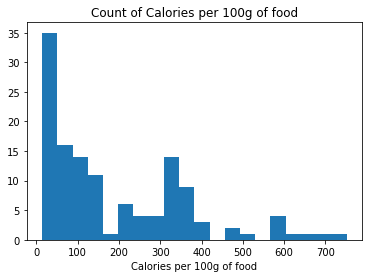

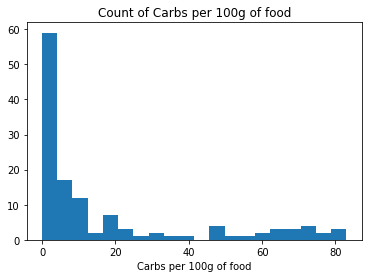

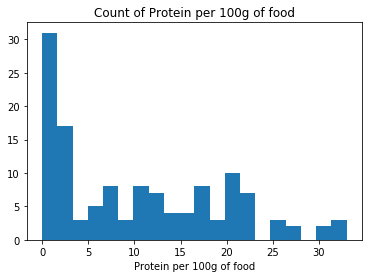

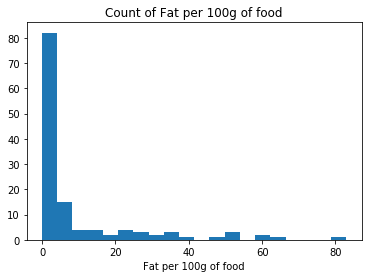

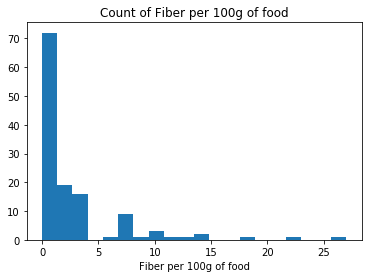

In [212]:
import matplotlib.pyplot as plt

for n in columns:
    plt.hist(solid_foods[n], bins=20)
    plt.xlabel(n + ' per 100g of food')
    plt.title('Count of ' + n + ' per 100g of food')
    plt.show()



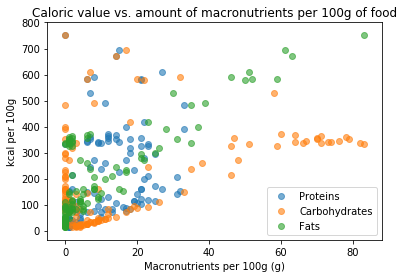

In [187]:
alpha=0.6
fig, ax = plt.subplots(sharey=True)
#ax = fig.add_subplot()
ax.set(title='Caloric value vs. amount of macronutrients per 100g of food', 
       ylabel='kcal per 100g', 
       xlabel='Macronutrients per 100g (g)')
ax1 = ax.scatter(x='Protein', y='Calories', data=solid_foods, alpha=alpha)
ax2 = ax.scatter(x='Carbs', y='Calories', data=solid_foods, alpha=alpha)
ax3 = ax.scatter(x='Fat', y='Calories', data=solid_foods, alpha=alpha)

ax.legend((ax1, ax2, ax3), ('Proteins', 'Carbohydrates', 'Fats'))
plt.show()



Limit in amount of proteins per 100g; linear dependence fat X calories

[  8.8585372  114.16512409] [[  0.34653682  -3.06468503]
 [ -3.06468503 113.04680929]]


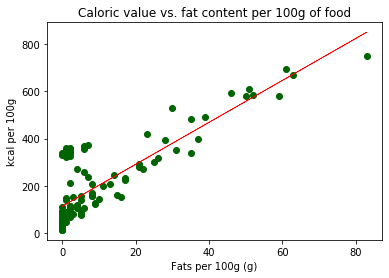

angular coeff.: 8.858537204824403 +/- 0.5886737833475261
linear coeff.: 114.16512409483421 +/- 10.632347308731974


In [188]:
import numpy as np

X_fat = np.array(solid_foods['Fat'])
Y = np.array(solid_foods['Calories'])
p_fat, cov_fat = np.polyfit(X_fat, Y, deg=1, cov=True)

print(p, cov)

fig, ax = plt.subplots()
ax.set(title='Caloric value vs. fat content per 100g of food', 
       ylabel='kcal per 100g', 
       xlabel='Fats per 100g (g)')
ax.scatter(x='Fat', y='Calories', data=solid_foods, color='darkgreen')
ax.plot(solid_foods['Fat'], p_fat[0]*solid_foods['Fat'] + p_fat[1], 'red', linewidth=0.7)
plt.show()

print('angular coeff.:', p_fat[0], '+/-', np.sqrt(cov_fat[0,0]))
print('linear coeff.:', p_fat[1], '+/-', np.sqrt(cov_fat[1,1]))

Aprox. 8.85 kcal per gram of fat; get uncertainty, comment b

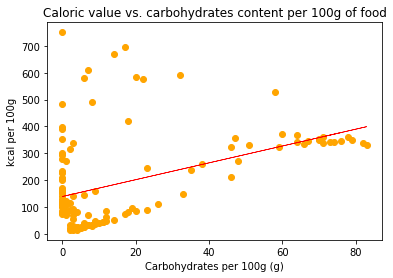

angular coeff.: 3.137356922033249 +/- 0.5747367934567247 
 linear coeff.: 138.5109585996934 +/- 17.095929099090988


In [189]:
X_carbs = np.array(solid_foods['Carbs'])
p_carbs, cov_carbs = np.polyfit(X_carbs, Y, deg=1, cov=True)

fig, ax = plt.subplots()
ax.set(title='Caloric value vs. carbohydrates content per 100g of food', 
       ylabel='kcal per 100g', 
       xlabel='Carbohydrates per 100g (g)')
ax.scatter(x='Carbs', y='Calories', data=solid_foods, color='orange')
ax.plot(solid_foods['Carbs'], p_carbs[0]*solid_foods['Carbs'] + p_carbs[1], 'red', linewidth=0.7)
plt.show()

print('angular coeff.:', p_carbs[0], '+/-', np.sqrt(cov_carbs[0,0]), '\n', 'linear coeff.:', p_carbs[1], '+/-', np.sqrt(cov_carbs[1,1]))


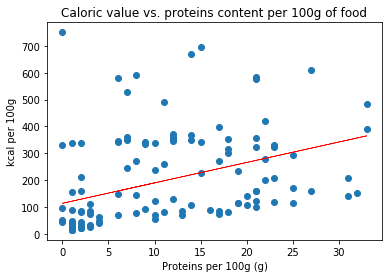

angular coeff.: 7.6200416866147425 +/- 1.553613973590997 
 linear coeff.: 113.2117536986653 +/- 21.52312647279291


In [190]:
X_prot = np.array(solid_foods['Protein'])
p_prot, cov_prot = np.polyfit(X_prot, Y, deg=1, cov=True)

fig, ax = plt.subplots()
ax.set(title='Caloric value vs. proteins content per 100g of food', 
       ylabel='kcal per 100g', 
       xlabel='Proteins per 100g (g)')
ax.scatter(x='Protein', y='Calories', data=solid_foods)
ax.plot(solid_foods['Protein'], p_prot[0]*solid_foods['Protein'] + p_prot[1], 'red', linewidth=0.7)
plt.show()

print('angular coeff.:', p_prot[0], '+/-', np.sqrt(cov_prot[0,0]), '\n', 'linear coeff.:', p_prot[1], '+/-', np.sqrt(cov_prot[1,1]))

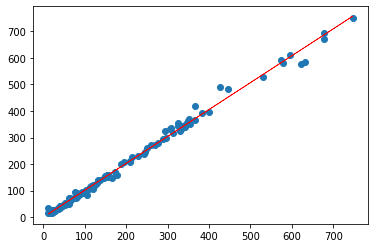

1.014154710154735 -0.24496709878439857


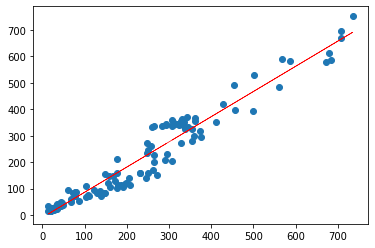

0.9510224479765522 -8.762394943584784


In [191]:
X_caloriesT = np.array(4*(solid_foods['Protein'] + solid_foods['Carbs']) + 9*solid_foods['Fat'])
X_caloriesP = np.array(p_prot[0]*solid_foods['Protein'] + p_carbs[0]*solid_foods['Carbs'] + p_fat[0]*solid_foods['Fat'])
a_kcT, b_kcT = np.polyfit(X_caloriesT, Y, deg=1)
a_kcP, b_kcP = np.polyfit(X_caloriesP, Y, deg=1)

plt.scatter(x=X_caloriesT, y=solid_foods['Calories'])
plt.plot(X_caloriesT, a_kcT*X_caloriesT + b_kcT, 'red', linewidth=0.7)
plt.show()

print(a_kcT, b_kcT)

plt.scatter(x=X_caloriesP, y=solid_foods['Calories'])
plt.plot(X_caloriesP, a_kcP*X_caloriesP + b_kcP, 'red', linewidth=0.7)
plt.show()

print(a_kcP, b_kcP)


Considering portion size:

In [192]:
portion_sizes = df[['Name', 'Portion_size_g']].set_index('Name')
portion_sizes.head()

solid_foods_portion = pd.merge(portion_sizes, solid_foods, on='Name', how='inner')
display(portion_sizes.shape)
display(solid_foods.shape)
display(solid_foods_portion.shape)
display(solid_foods_portion.head())

(135, 1)

(128, 5)

(128, 6)

,Portion_size_g,Calories,Carbs,Fat,Protein,Fiber
Name,,,,,,
Flour 0,0.3,338.0,71.0,1.0,10.0,2.0
Flour 00,0.3,340.0,74.0,1.0,9.0,2.0
Whole wheat flour,0.3,362.0,71.0,2.0,12.0,7.0
Potatoes,2.0,110.0,26.0,0.0,3.0,2.0
Pasta,1.2,351.0,70.0,1.0,14.0,3.0


In [194]:
for column in columns:
    solid_foods_portion[column + '_per_portion'] = solid_foods_portion[column] * solid_foods_portion['Portion_size_g']
    solid_foods_portion.drop(column, axis=1, inplace=True)
    
display(solid_foods_portion.head())

,Portion_size_g,Calories_per_portion,Carbs_per_portion,Protein_per_portion,Fat_per_portion,Fiber_per_portion
Name,,,,,,
Flour 0,0.3,101.4,21.3,3.0,0.3,0.6
Flour 00,0.3,102.0,22.2,2.7,0.3,0.6
Whole wheat flour,0.3,108.6,21.3,3.6,0.6,2.1
Potatoes,2.0,220.0,52.0,6.0,0.0,4.0
Pasta,1.2,421.2,84.0,16.8,1.2,3.6


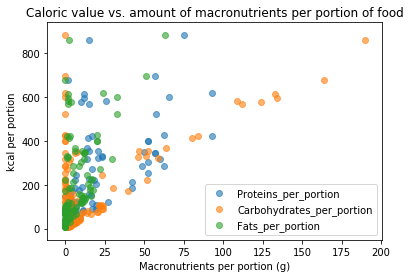

In [196]:
alpha=0.6
fig, ax = plt.subplots(sharey=True)
ax.set(title='Caloric value vs. amount of macronutrients per portion of food', 
       ylabel='kcal per portion', 
       xlabel='Macronutrients per portion (g)')
ax1 = ax.scatter(x='Protein_per_portion', y='Calories_per_portion', data=solid_foods_portion, alpha=alpha)
ax2 = ax.scatter(x='Carbs_per_portion', y='Calories_per_portion', data=solid_foods_portion, alpha=alpha)
ax3 = ax.scatter(x='Fat_per_portion', y='Calories_per_portion', data=solid_foods_portion, alpha=alpha)

ax.legend((ax1, ax2, ax3), ('Proteins_per_portion', 'Carbohydrates_per_portion', 'Fats_per_portion'))
plt.show()

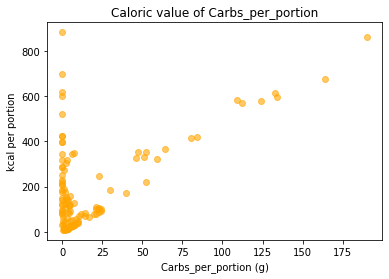

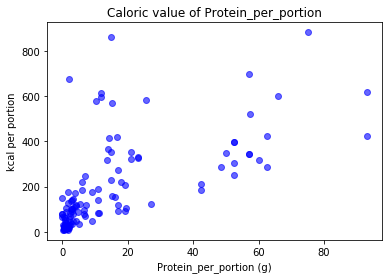

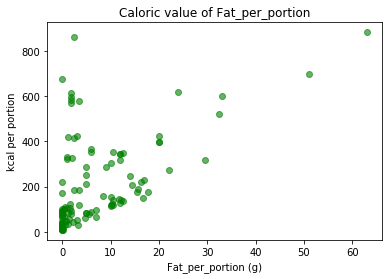

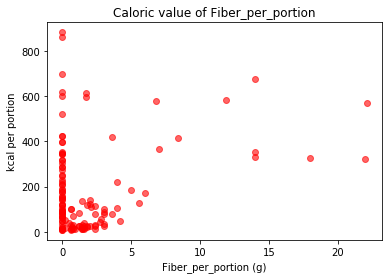

In [213]:
macronutrients_per_portion = {'Carbs_per_portion':'orange', 'Protein_per_portion':'blue', 'Fat_per_portion':'green', 'Fiber_per_portion':'red'}
for m in macronutrients_per_portion.keys():
    fig, ax = plt.subplots()
    ax.set(title='Caloric value of '+m, 
       ylabel ='kcal per portion', 
       xlabel = m + ' (g)')
    ax.scatter(x=m, y='Calories_per_portion', data=solid_foods_portion, color=macronutrients_per_portion[m], alpha=alpha)
    #ax.plot(solid_foods['Carbs'], p_carbs[0]*solid_foods['Carbs'] + p_carbs[1], 'red', linewidth=0.7)
    plt.show()

Visualize the avocado: superfoods